# Stroke Prediction use ANN

## Deskripsi

## Eksplorasi Data

### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [96]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [97]:
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
285,65460,Female,32.0,0,0,Yes,Private,Rural,62.60,25.1,formerly smoked,0
3943,21333,Male,56.0,1,0,Yes,Private,Rural,206.66,21.9,smokes,0
4208,60602,Female,49.0,0,0,Yes,Govt_job,Urban,68.68,28.8,never smoked,0
3352,50434,Male,38.0,0,0,Yes,Govt_job,Rural,135.74,31.3,formerly smoked,0
1477,742,Female,39.0,0,0,No,Govt_job,Rural,87.33,34.3,never smoked,0
4553,69059,Female,42.0,0,0,Yes,Private,Urban,86.30,20.1,never smoked,0
972,19101,Female,16.0,0,0,No,Private,Urban,87.98,22.4,never smoked,0
4424,28367,Female,7.0,0,0,No,children,Rural,69.47,18.9,Unknown,0
1435,49976,Female,54.0,0,1,Yes,Private,Urban,140.28,37.1,formerly smoked,0
2158,62456,Female,72.0,0,0,Yes,Self-employed,Urban,226.88,36.7,formerly smoked,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### Drop unnecessary column

In [100]:
df.drop(['id'],axis=1,inplace = True)

In [101]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [102]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [103]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [104]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 5110
Variables: 11
cat_cols: 8
num_cols: 3
cat_but_car: 0
num_but_cat: 3


In [105]:
cat_cols, num_cols, cat_but_car

(['gender',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status',
  'hypertension',
  'heart_disease',
  'stroke'],
 ['age', 'avg_glucose_level', 'bmi'],
 [])

### Remove duplicates

In [106]:
df.drop_duplicates(inplace=True)

### Search for null values

In [107]:
# checking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [108]:
print((df.isna().sum()/len(df))*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


## Data Visualization

Text(0.5, 0, 'Gender')

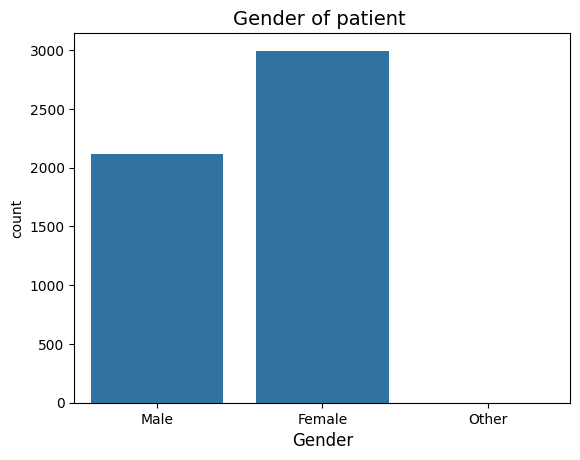

In [109]:
sns.countplot(x=df['gender'])
plt.title('Gender of patient ' , size = 14)
plt.xlabel('Gender',size = 12)

Text(0.5, 1.0, '0 = never smoked & 1 = formerly smoked & 2 = smokes')

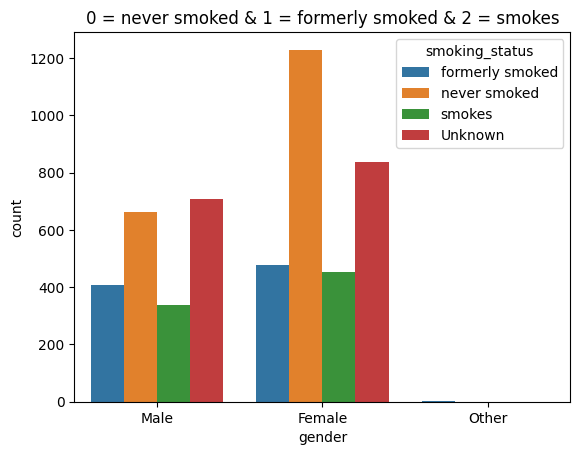

In [112]:
smke = sns.countplot(x="gender", hue = "smoking_status" ,data=df, )
plt.title("0 = never smoked & 1 = formerly smoked & 2 = smokes")

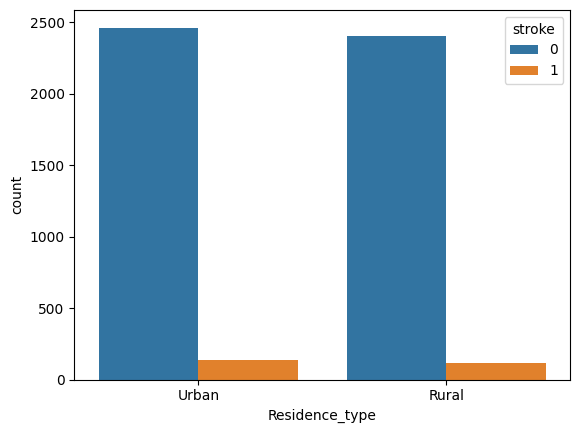

In [113]:
rsdnt = sns.countplot(x="Residence_type", hue = "stroke" ,data=df, )

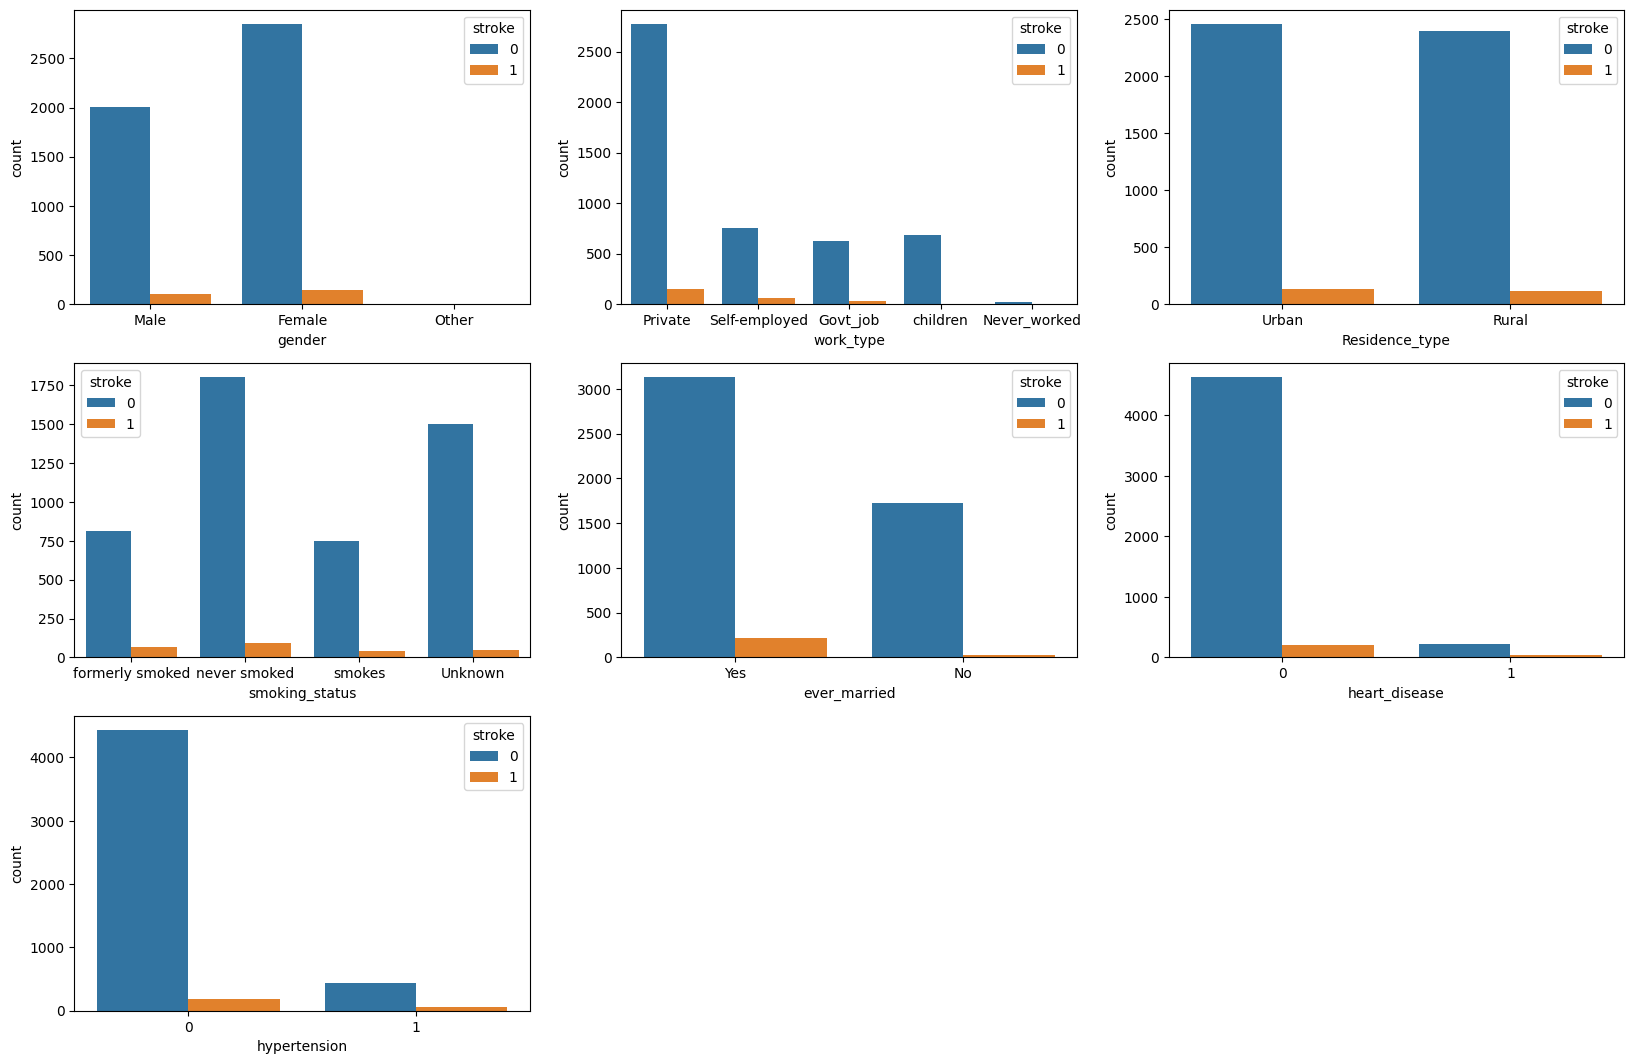

In [114]:
cols = ['gender','work_type','Residence_type','smoking_status','ever_married','heart_disease','hypertension']
plt.figure(figsize=(20,13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    
    sns.countplot(x=df[cols[i]],hue = df['stroke'])

        gender      Ratio
gender                   
Female    2994  58.590998
Male      2115  41.389432
Other        1   0.019569


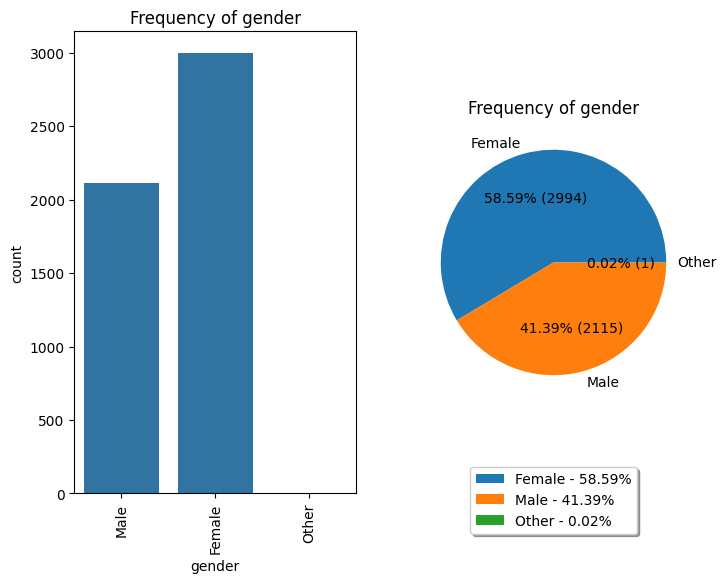

              ever_married      Ratio
ever_married                         
Yes                   3353  65.616438
No                    1757  34.383562


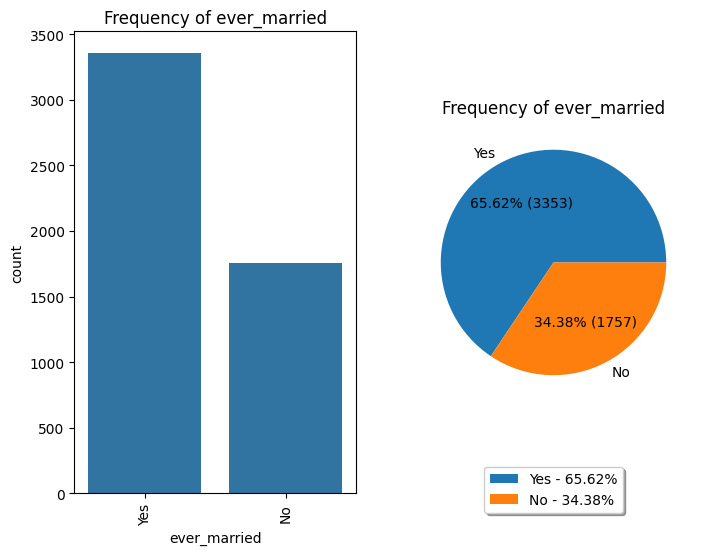

               work_type      Ratio
work_type                          
Private             2925  57.240705
Self-employed        819  16.027397
children             687  13.444227
Govt_job             657  12.857143
Never_worked          22   0.430528


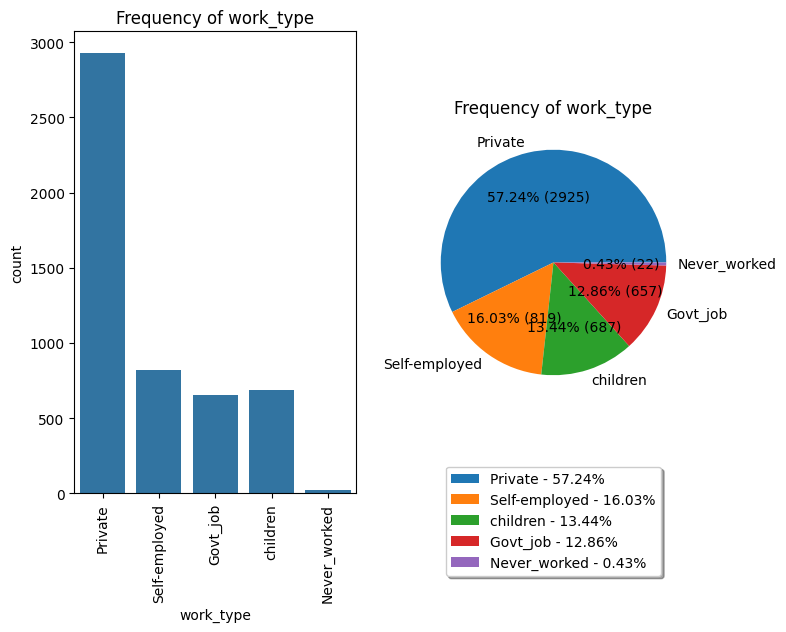

                Residence_type      Ratio
Residence_type                           
Urban                     2596  50.802348
Rural                     2514  49.197652


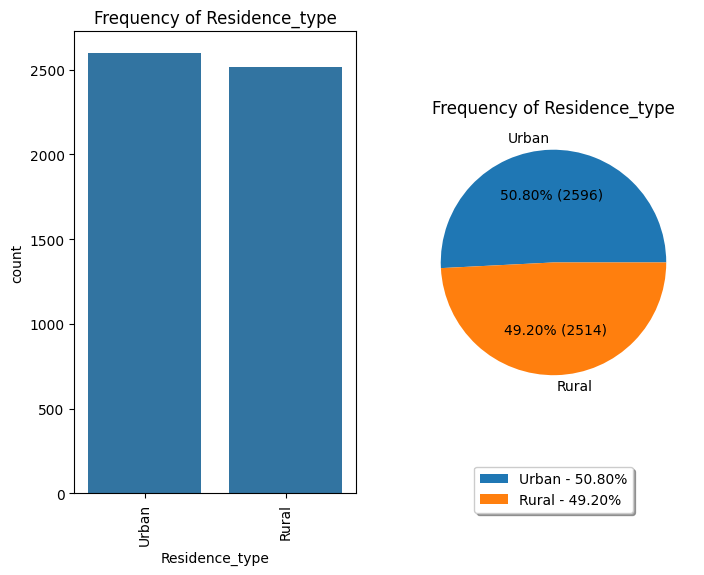

                 smoking_status      Ratio
smoking_status                            
never smoked               1892  37.025440
Unknown                    1544  30.215264
formerly smoked             885  17.318982
smokes                      789  15.440313


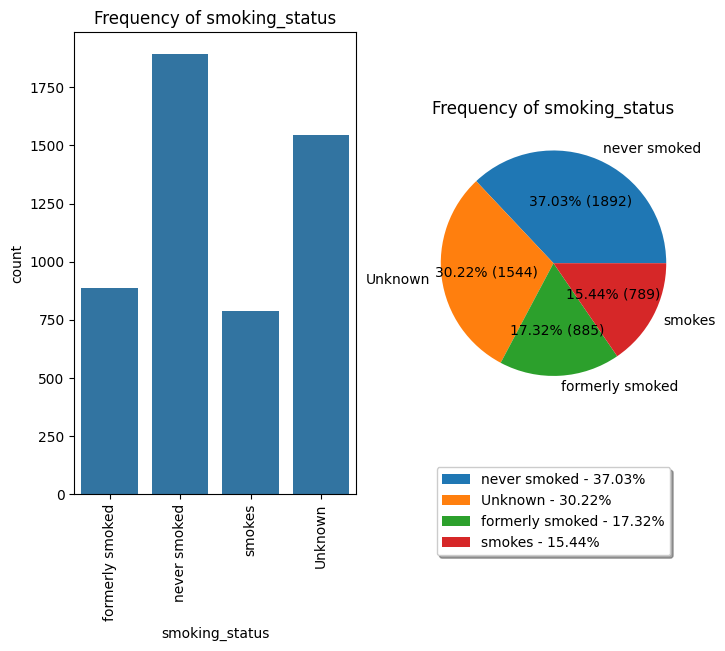

              hypertension      Ratio
hypertension                         
0                     4612  90.254403
1                      498   9.745597


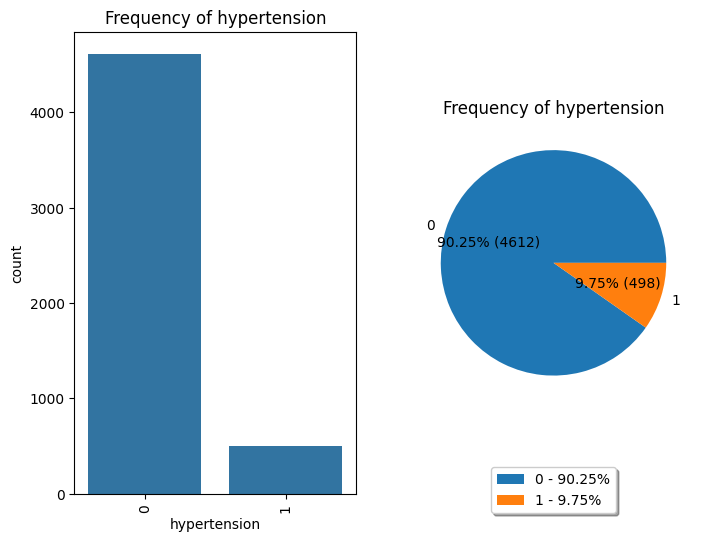

               heart_disease      Ratio
heart_disease                          
0                       4834  94.598826
1                        276   5.401174


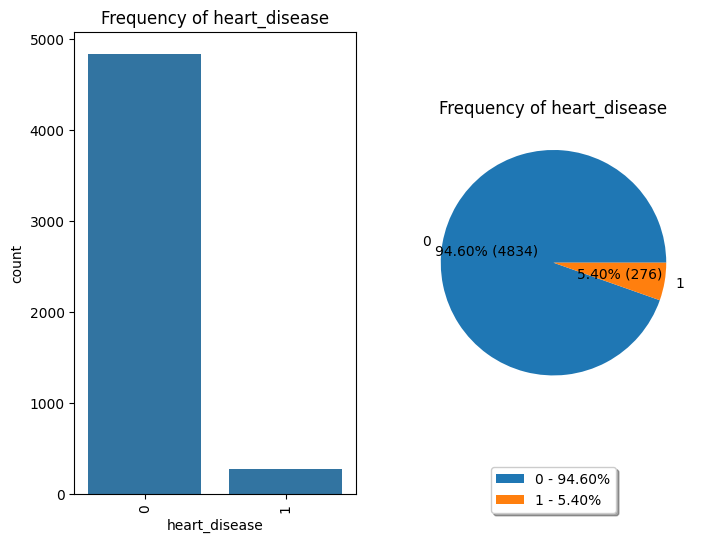

        stroke      Ratio
stroke                   
0         4861  95.127202
1          249   4.872798


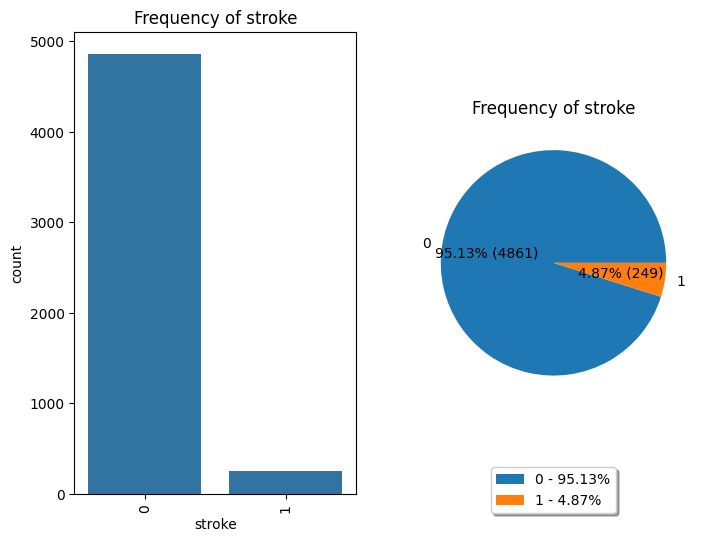

In [115]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

## Preprocessing

### Category to numerical values

In [116]:
dfd = pd.get_dummies(df, ['gender','ever_married', 'work_type','Residence_type', 'smoking_status'], drop_first = True)
dfd.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,NaN,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [117]:
dfd[["age","gender_Male","gender_Other","ever_married_Yes","work_type_Never_worked","work_type_Private","work_type_Self-employed","work_type_children","Residence_type_Urban","smoking_status_formerly smoked","smoking_status_never smoked",
"smoking_status_smokes"]] = dfd[["age","gender_Male","gender_Other","ever_married_Yes","work_type_Never_worked","work_type_Private","work_type_Self-employed","work_type_children","Residence_type_Urban","smoking_status_formerly smoked","smoking_status_never smoked",
"smoking_status_smokes"]].astype(int)
dfd.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


### Resample Unbalanced Data

In [118]:
df_0 = df[df.iloc[:,-1]==0]
df_1 = df[df.iloc[:,-1]==1]

df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [119]:
from sklearn.utils import resample

df_1 = resample(df_1,replace=True , n_samples=df_0.shape[0] , random_state=123 )

In [120]:
#concat upsampled data 
df = np.concatenate((df_0,df_1))

#create the balanced dataframe
df = pd.DataFrame(df)
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']

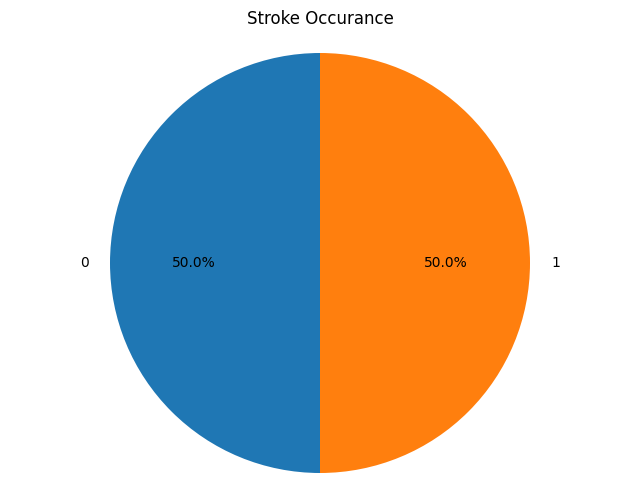

In [121]:
stroke = df['stroke'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
plt.pie(stroke.values, labels=stroke.index, autopct='%1.1f%%', startangle=90)
plt.title('Stroke Occurance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Divide the data

In [122]:
dfd.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [123]:
df_rf = dfd.dropna()

X = df_rf.drop("stroke", axis=1)
Y = df_rf["stroke"]

In [124]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
2,80,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0
5,81,0,0,186.21,29.0,1,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13,0,0,103.08,18.6,0,0,0,0,0,0,1,0,0,0,0
5106,81,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51,0,0,166.29,25.6,1,0,1,0,1,0,0,0,1,0,0


In [125]:
Y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

## Divide data into training and test sets for data and labels

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Pemodelan ANN

In [127]:
X_train.shape[1]

16

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [129]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(X_train.shape[1],), activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1024, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(1024, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(512, activation="elu", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, activation="leaky_relu", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(32, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(8, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True)
model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,178,481 (8.31 MB)

 Trainable params: 2,178,481 (8.31 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=18,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/18


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9056 - loss: 5.3974

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.9073 - loss: 5.3826 - val_accuracy: 0.9618 - val_loss: 2.2356
Epoch 2/18
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9594 - loss: 1.4705 - val_accuracy: 0.9618 - val_loss: 0.3271
Epoch 3/18
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9559 - loss: 0.2332 - val_accuracy: 0.9618 - val_loss: 0.0812
Epoch 4/18
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9595 - loss: 0.0657 - val_accuracy: 0.9618 - val_loss: 0.0381
Epoch 5/18
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9566 - loss: 0.0345 - val_accuracy: 0.9618 - val_loss: 0.0270
Epoch 6/18
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9571 - loss: 0.0257 - val_accuracy: 0.9618 - val_loss: 0.0225
Epoch 7/18
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9606 - loss: 0.0216 - val_accuracy: 0.9618 - val_loss: 0.0194
Epoch 8/18
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9660 - loss: 0.0190 - val_accuracy: 0.9618 - val_loss: 0.

In [131]:
loss_and_metrics = model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9467 - loss: 0.0099
Loss =  0.009912203997373581
Accuracy =  0.9460285305976868


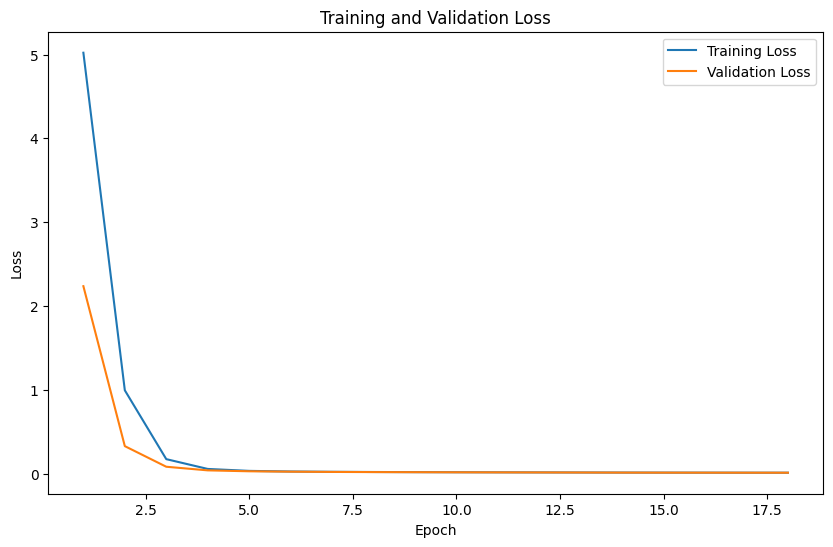

In [132]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [133]:
predicted = model.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [134]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

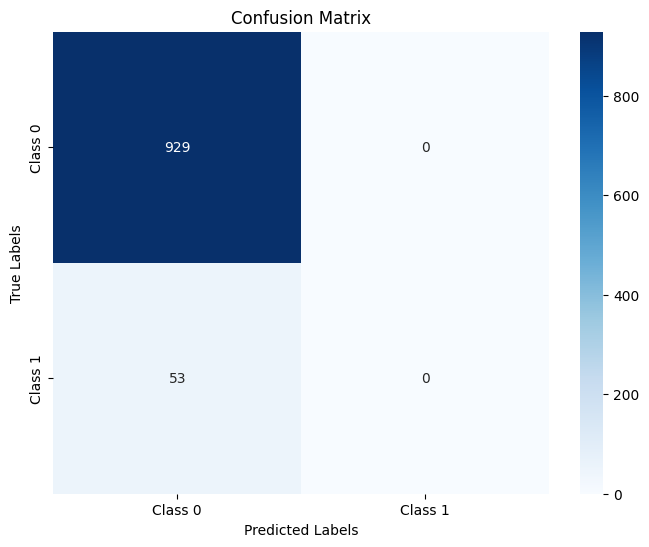

In [135]:
from sklearn.metrics import make_scorer, classification_report,confusion_matrix

cm = confusion_matrix(y_test, predicted)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [136]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,